# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

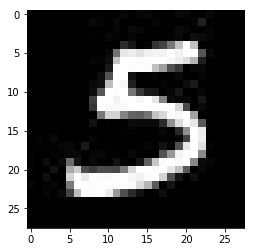

In [2]:
show_n_images = 1

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

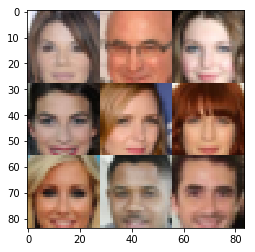

In [3]:
show_n_images = 10

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.15

        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'SAME')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, 2, 'SAME')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        conv3 = tf.layers.conv2d(lrelu2, 256, 5, 1, 'SAME')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        conv4 = tf.layers.conv2d(lrelu3, 512, 5, 1, 'SAME')
        batch_norm4 = tf.layers.batch_normalization(conv4, training=True)
        lrelu4 = tf.maximum(alpha * batch_norm4, batch_norm4)

        flat = tf.reshape(lrelu3, (-1, 7*7*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=False if is_train==True else True):
        alpha = 0.15
        
        fc1 = tf.reshape(tf.layers.dense(z, 7*7*512), (-1, 7, 7, 512))
        batch_norm1 = tf.layers.batch_normalization(fc1, training=is_train)
        lrelu1 = tf.maximum(alpha*batch_norm1, batch_norm1)
        
        conv2 = tf.layers.conv2d_transpose(fc1, 256, 3, 1, 'SAME')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=is_train)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        conv3 = tf.layers.conv2d_transpose(lrelu2, 128, 3, 1, 'SAME')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=is_train)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        conv4 = tf.layers.conv2d_transpose(lrelu3, 64, 3, 2, 'SAME')
        batch_norm4 = tf.layers.batch_normalization(conv4, training=is_train)
        lrelu4 = tf.maximum(alpha * batch_norm4, batch_norm4)
        
        logits = tf.layers.conv2d_transpose(lrelu4, out_channel_dim, 3, 2, 'SAME')
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(g_updates):
        d_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
        return d_train_ops, g_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, _ = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 25
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                
                #print out results every steps
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),"Discriminator Loss: {:.4f}...".format(train_loss_d),\
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 5.1598... Generator Loss: 0.1810
Epoch 1/2... Discriminator Loss: 2.0120... Generator Loss: 1.5603
Epoch 1/2... Discriminator Loss: 3.5279... Generator Loss: 0.0950
Epoch 1/2... Discriminator Loss: 2.0289... Generator Loss: 2.7784


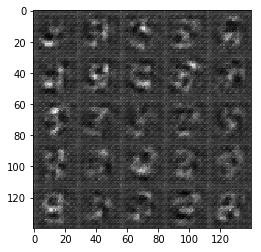

Epoch 1/2... Discriminator Loss: 1.3142... Generator Loss: 0.7439
Epoch 1/2... Discriminator Loss: 1.0341... Generator Loss: 1.3519
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.7073
Epoch 1/2... Discriminator Loss: 2.5036... Generator Loss: 0.1977


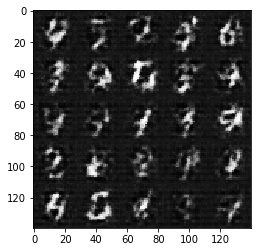

Epoch 1/2... Discriminator Loss: 1.5532... Generator Loss: 2.9465
Epoch 1/2... Discriminator Loss: 1.3582... Generator Loss: 0.6589
Epoch 1/2... Discriminator Loss: 1.6750... Generator Loss: 0.4701
Epoch 1/2... Discriminator Loss: 0.8506... Generator Loss: 2.6616


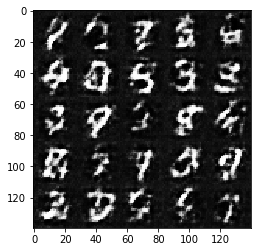

Epoch 1/2... Discriminator Loss: 1.7150... Generator Loss: 2.8486
Epoch 1/2... Discriminator Loss: 1.6307... Generator Loss: 0.4177
Epoch 1/2... Discriminator Loss: 1.6688... Generator Loss: 0.4100
Epoch 1/2... Discriminator Loss: 1.0762... Generator Loss: 1.1324


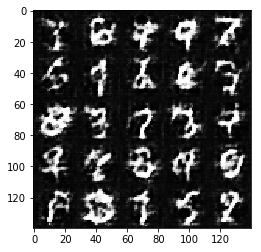

Epoch 1/2... Discriminator Loss: 1.8439... Generator Loss: 0.3167
Epoch 1/2... Discriminator Loss: 2.6795... Generator Loss: 0.1515
Epoch 1/2... Discriminator Loss: 1.2277... Generator Loss: 0.7408
Epoch 1/2... Discriminator Loss: 1.5774... Generator Loss: 0.4445


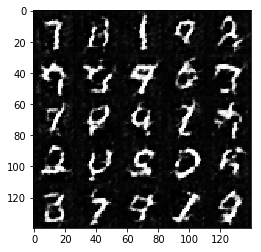

Epoch 1/2... Discriminator Loss: 4.0690... Generator Loss: 5.2171
Epoch 1/2... Discriminator Loss: 1.1646... Generator Loss: 1.7250
Epoch 1/2... Discriminator Loss: 1.1039... Generator Loss: 0.8822
Epoch 1/2... Discriminator Loss: 0.9292... Generator Loss: 2.1087


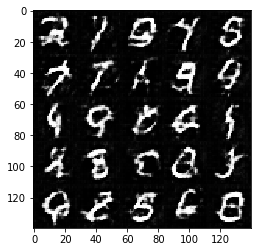

Epoch 1/2... Discriminator Loss: 1.7242... Generator Loss: 3.2629
Epoch 1/2... Discriminator Loss: 2.2485... Generator Loss: 0.2034
Epoch 1/2... Discriminator Loss: 1.5933... Generator Loss: 2.4095
Epoch 1/2... Discriminator Loss: 1.0781... Generator Loss: 1.8441


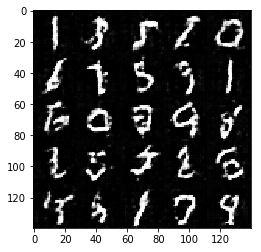

Epoch 1/2... Discriminator Loss: 1.1257... Generator Loss: 0.8945
Epoch 1/2... Discriminator Loss: 2.2316... Generator Loss: 0.2341
Epoch 1/2... Discriminator Loss: 0.8574... Generator Loss: 1.1969
Epoch 1/2... Discriminator Loss: 1.3047... Generator Loss: 0.6898


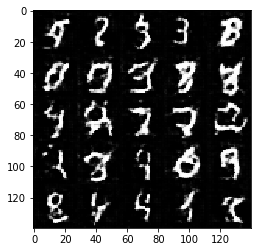

Epoch 1/2... Discriminator Loss: 1.3986... Generator Loss: 0.5019
Epoch 1/2... Discriminator Loss: 0.9687... Generator Loss: 0.9969
Epoch 1/2... Discriminator Loss: 0.9559... Generator Loss: 1.3804
Epoch 1/2... Discriminator Loss: 1.2186... Generator Loss: 0.6791


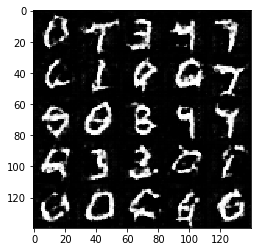

Epoch 1/2... Discriminator Loss: 1.9701... Generator Loss: 4.7521
Epoch 1/2... Discriminator Loss: 1.3707... Generator Loss: 0.5273
Epoch 1/2... Discriminator Loss: 1.9045... Generator Loss: 0.2840
Epoch 1/2... Discriminator Loss: 1.5478... Generator Loss: 3.3145


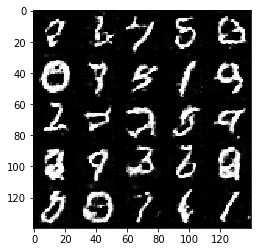

Epoch 1/2... Discriminator Loss: 1.2457... Generator Loss: 3.1768
Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 1.5981
Epoch 1/2... Discriminator Loss: 1.2977... Generator Loss: 1.8826
Epoch 1/2... Discriminator Loss: 0.6347... Generator Loss: 2.4383


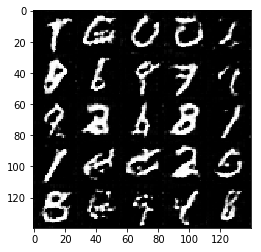

Epoch 1/2... Discriminator Loss: 3.1957... Generator Loss: 4.8415
Epoch 1/2... Discriminator Loss: 0.8471... Generator Loss: 1.8559
Epoch 1/2... Discriminator Loss: 1.4551... Generator Loss: 0.5969
Epoch 1/2... Discriminator Loss: 2.6881... Generator Loss: 0.1600


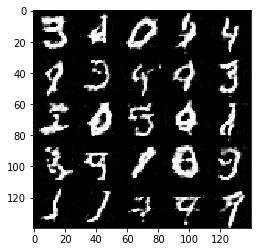

Epoch 1/2... Discriminator Loss: 1.8857... Generator Loss: 3.5485
Epoch 1/2... Discriminator Loss: 0.9220... Generator Loss: 1.3994
Epoch 1/2... Discriminator Loss: 2.3419... Generator Loss: 4.3363
Epoch 1/2... Discriminator Loss: 2.1471... Generator Loss: 0.3121


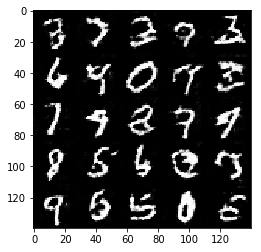

Epoch 1/2... Discriminator Loss: 2.0249... Generator Loss: 0.4269
Epoch 1/2... Discriminator Loss: 0.8845... Generator Loss: 1.5799
Epoch 1/2... Discriminator Loss: 1.1805... Generator Loss: 2.6280
Epoch 1/2... Discriminator Loss: 1.9845... Generator Loss: 0.3371


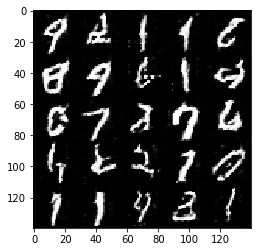

Epoch 1/2... Discriminator Loss: 1.6347... Generator Loss: 0.4649
Epoch 1/2... Discriminator Loss: 0.9770... Generator Loss: 1.1804
Epoch 1/2... Discriminator Loss: 1.0874... Generator Loss: 0.8138
Epoch 1/2... Discriminator Loss: 1.0728... Generator Loss: 2.5701


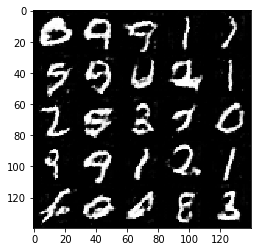

Epoch 1/2... Discriminator Loss: 1.0296... Generator Loss: 0.9001
Epoch 1/2... Discriminator Loss: 1.7821... Generator Loss: 3.6466
Epoch 1/2... Discriminator Loss: 0.7875... Generator Loss: 1.5571
Epoch 1/2... Discriminator Loss: 1.3363... Generator Loss: 2.7965


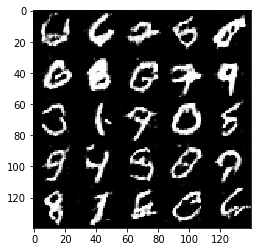

Epoch 1/2... Discriminator Loss: 2.1418... Generator Loss: 0.2928
Epoch 1/2... Discriminator Loss: 0.9500... Generator Loss: 0.9977
Epoch 1/2... Discriminator Loss: 1.0895... Generator Loss: 0.8569
Epoch 1/2... Discriminator Loss: 0.9144... Generator Loss: 2.3100


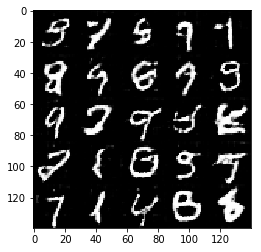

Epoch 1/2... Discriminator Loss: 0.8670... Generator Loss: 1.1024
Epoch 1/2... Discriminator Loss: 1.2219... Generator Loss: 0.6529
Epoch 1/2... Discriminator Loss: 1.8192... Generator Loss: 0.5892
Epoch 1/2... Discriminator Loss: 1.2153... Generator Loss: 0.8296


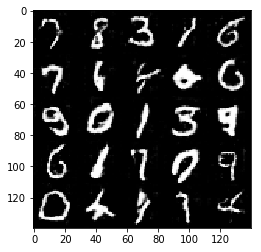

Epoch 1/2... Discriminator Loss: 2.4825... Generator Loss: 0.2290
Epoch 1/2... Discriminator Loss: 0.6419... Generator Loss: 1.8571
Epoch 1/2... Discriminator Loss: 0.6982... Generator Loss: 1.4456
Epoch 2/2... Discriminator Loss: 1.0408... Generator Loss: 1.4242


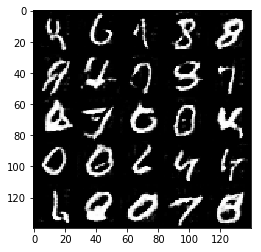

Epoch 2/2... Discriminator Loss: 0.7045... Generator Loss: 1.6871
Epoch 2/2... Discriminator Loss: 2.7387... Generator Loss: 0.1649
Epoch 2/2... Discriminator Loss: 1.3537... Generator Loss: 0.6929
Epoch 2/2... Discriminator Loss: 1.8996... Generator Loss: 0.3022


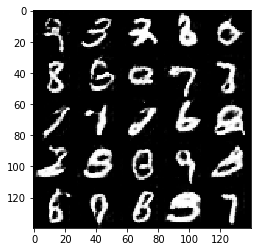

Epoch 2/2... Discriminator Loss: 1.0392... Generator Loss: 2.0426
Epoch 2/2... Discriminator Loss: 2.7518... Generator Loss: 0.1903
Epoch 2/2... Discriminator Loss: 0.6573... Generator Loss: 2.1126
Epoch 2/2... Discriminator Loss: 1.1186... Generator Loss: 0.7472


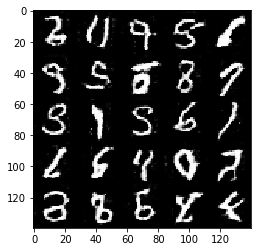

Epoch 2/2... Discriminator Loss: 1.1972... Generator Loss: 0.8065
Epoch 2/2... Discriminator Loss: 0.9039... Generator Loss: 1.9170
Epoch 2/2... Discriminator Loss: 1.1584... Generator Loss: 3.1790
Epoch 2/2... Discriminator Loss: 1.1944... Generator Loss: 0.7351


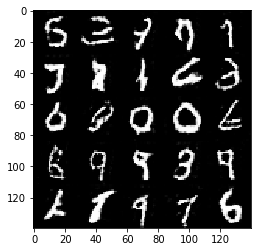

Epoch 2/2... Discriminator Loss: 0.6726... Generator Loss: 1.6216
Epoch 2/2... Discriminator Loss: 1.4331... Generator Loss: 0.5379
Epoch 2/2... Discriminator Loss: 1.0860... Generator Loss: 0.8443
Epoch 2/2... Discriminator Loss: 1.7042... Generator Loss: 0.5294


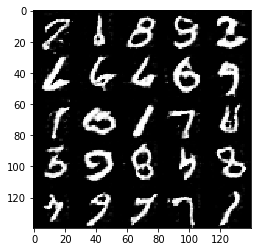

Epoch 2/2... Discriminator Loss: 1.1262... Generator Loss: 0.8292
Epoch 2/2... Discriminator Loss: 1.5664... Generator Loss: 0.4731
Epoch 2/2... Discriminator Loss: 1.1373... Generator Loss: 0.6785
Epoch 2/2... Discriminator Loss: 2.0249... Generator Loss: 6.0374


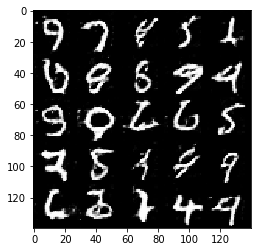

Epoch 2/2... Discriminator Loss: 1.1492... Generator Loss: 0.7304
Epoch 2/2... Discriminator Loss: 0.9545... Generator Loss: 1.1228
Epoch 2/2... Discriminator Loss: 1.3845... Generator Loss: 3.9912
Epoch 2/2... Discriminator Loss: 1.0867... Generator Loss: 0.7643


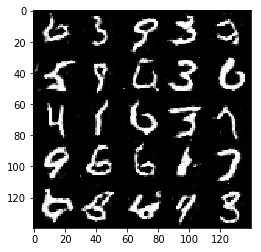

Epoch 2/2... Discriminator Loss: 0.9695... Generator Loss: 1.0345
Epoch 2/2... Discriminator Loss: 0.7147... Generator Loss: 2.1700
Epoch 2/2... Discriminator Loss: 0.6247... Generator Loss: 1.6804
Epoch 2/2... Discriminator Loss: 0.6819... Generator Loss: 1.5891


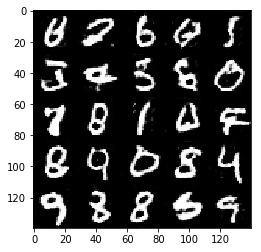

Epoch 2/2... Discriminator Loss: 0.8518... Generator Loss: 1.2340
Epoch 2/2... Discriminator Loss: 0.9142... Generator Loss: 1.0738
Epoch 2/2... Discriminator Loss: 0.5708... Generator Loss: 2.2493
Epoch 2/2... Discriminator Loss: 0.8135... Generator Loss: 1.6328


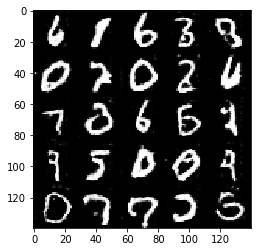

Epoch 2/2... Discriminator Loss: 1.0317... Generator Loss: 0.8267
Epoch 2/2... Discriminator Loss: 0.8675... Generator Loss: 2.5855
Epoch 2/2... Discriminator Loss: 1.0600... Generator Loss: 3.0497
Epoch 2/2... Discriminator Loss: 0.8731... Generator Loss: 1.0862


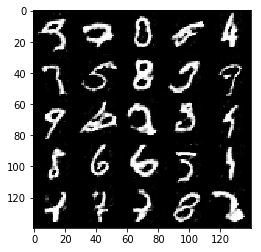

Epoch 2/2... Discriminator Loss: 1.0790... Generator Loss: 3.6755
Epoch 2/2... Discriminator Loss: 1.0492... Generator Loss: 0.8698
Epoch 2/2... Discriminator Loss: 1.3815... Generator Loss: 0.6635
Epoch 2/2... Discriminator Loss: 0.6418... Generator Loss: 2.6300


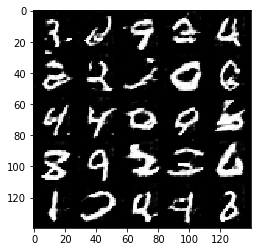

Epoch 2/2... Discriminator Loss: 1.6332... Generator Loss: 0.4221
Epoch 2/2... Discriminator Loss: 0.6961... Generator Loss: 1.4629
Epoch 2/2... Discriminator Loss: 0.5262... Generator Loss: 2.2924
Epoch 2/2... Discriminator Loss: 1.2351... Generator Loss: 0.8787


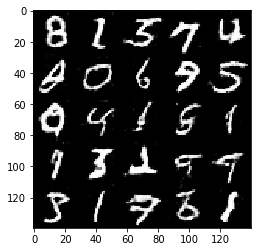

Epoch 2/2... Discriminator Loss: 1.0494... Generator Loss: 1.0091
Epoch 2/2... Discriminator Loss: 0.8886... Generator Loss: 1.1584
Epoch 2/2... Discriminator Loss: 1.2228... Generator Loss: 3.6575
Epoch 2/2... Discriminator Loss: 0.8612... Generator Loss: 1.0927


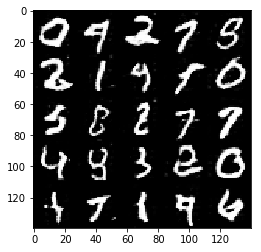

Epoch 2/2... Discriminator Loss: 1.0804... Generator Loss: 0.8726
Epoch 2/2... Discriminator Loss: 1.8857... Generator Loss: 0.4904
Epoch 2/2... Discriminator Loss: 0.6890... Generator Loss: 1.8835
Epoch 2/2... Discriminator Loss: 0.7620... Generator Loss: 1.4205


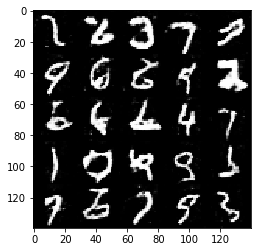

Epoch 2/2... Discriminator Loss: 2.3736... Generator Loss: 0.2596
Epoch 2/2... Discriminator Loss: 0.9476... Generator Loss: 2.9649
Epoch 2/2... Discriminator Loss: 0.9304... Generator Loss: 1.1779
Epoch 2/2... Discriminator Loss: 0.9188... Generator Loss: 1.2116


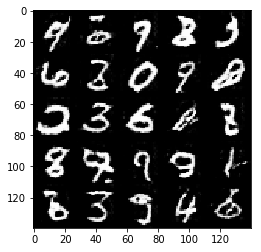

Epoch 2/2... Discriminator Loss: 0.8412... Generator Loss: 1.1899
Epoch 2/2... Discriminator Loss: 1.1681... Generator Loss: 1.0284
Epoch 2/2... Discriminator Loss: 1.4704... Generator Loss: 0.5357
Epoch 2/2... Discriminator Loss: 0.6621... Generator Loss: 1.5203


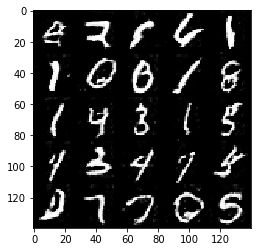

Epoch 2/2... Discriminator Loss: 1.1544... Generator Loss: 0.8530
Epoch 2/2... Discriminator Loss: 0.6248... Generator Loss: 1.6314
Epoch 2/2... Discriminator Loss: 2.0191... Generator Loss: 0.3328
Epoch 2/2... Discriminator Loss: 1.4277... Generator Loss: 0.7516


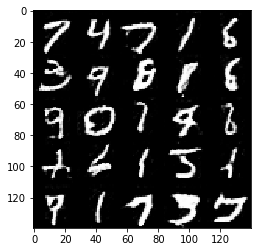

Epoch 2/2... Discriminator Loss: 0.9260... Generator Loss: 0.9872
Epoch 2/2... Discriminator Loss: 0.8304... Generator Loss: 1.2532
Epoch 2/2... Discriminator Loss: 0.6579... Generator Loss: 1.8762
Epoch 2/2... Discriminator Loss: 0.9586... Generator Loss: 1.2902


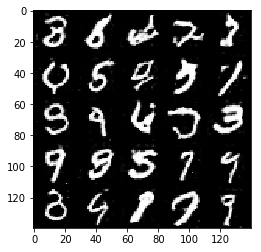

Epoch 2/2... Discriminator Loss: 0.8311... Generator Loss: 1.3456
Epoch 2/2... Discriminator Loss: 0.7051... Generator Loss: 1.6204
Epoch 2/2... Discriminator Loss: 1.3425... Generator Loss: 0.5997
Epoch 2/2... Discriminator Loss: 0.8850... Generator Loss: 1.1809


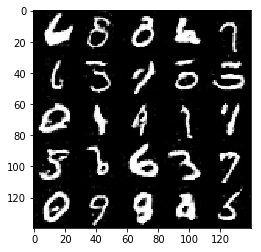

Epoch 2/2... Discriminator Loss: 1.0776... Generator Loss: 2.2926
Epoch 2/2... Discriminator Loss: 0.7731... Generator Loss: 2.5631


In [25]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.8474... Generator Loss: 0.1292
Epoch 1/1... Discriminator Loss: 4.2023... Generator Loss: 0.0317
Epoch 1/1... Discriminator Loss: 1.0743... Generator Loss: 1.3528
Epoch 1/1... Discriminator Loss: 1.9011... Generator Loss: 1.9206


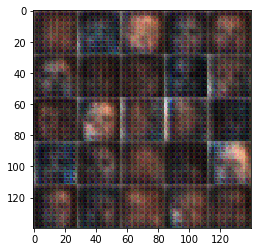

Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 3.2684... Generator Loss: 0.0665
Epoch 1/1... Discriminator Loss: 2.1864... Generator Loss: 0.2631
Epoch 1/1... Discriminator Loss: 1.9040... Generator Loss: 0.2841


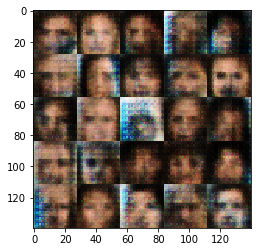

Epoch 1/1... Discriminator Loss: 1.5940... Generator Loss: 0.5021
Epoch 1/1... Discriminator Loss: 1.9854... Generator Loss: 0.2671
Epoch 1/1... Discriminator Loss: 1.5271... Generator Loss: 0.5101
Epoch 1/1... Discriminator Loss: 1.7053... Generator Loss: 0.4873


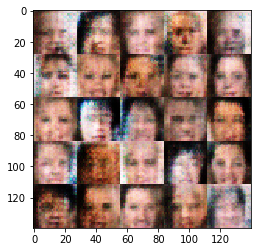

Epoch 1/1... Discriminator Loss: 2.3064... Generator Loss: 0.1853
Epoch 1/1... Discriminator Loss: 1.1832... Generator Loss: 1.3921
Epoch 1/1... Discriminator Loss: 2.2337... Generator Loss: 1.6660
Epoch 1/1... Discriminator Loss: 1.4642... Generator Loss: 0.5068


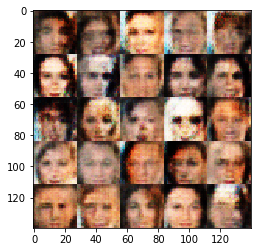

Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.6951... Generator Loss: 0.5802
Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.5508


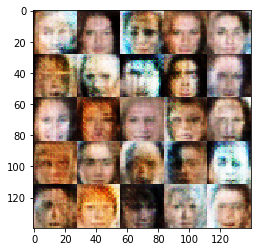

Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 1.9241... Generator Loss: 1.3442
Epoch 1/1... Discriminator Loss: 1.5008... Generator Loss: 1.2886
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.5419


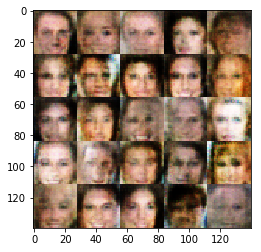

Epoch 1/1... Discriminator Loss: 1.4989... Generator Loss: 0.5182
Epoch 1/1... Discriminator Loss: 1.4794... Generator Loss: 0.7914
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.8344


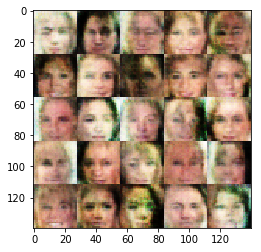

Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.4617... Generator Loss: 1.1346
Epoch 1/1... Discriminator Loss: 1.7287... Generator Loss: 0.3761


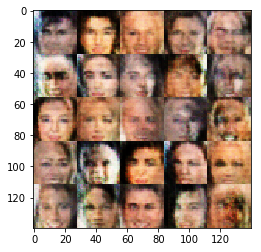

Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 1.0370
Epoch 1/1... Discriminator Loss: 1.7925... Generator Loss: 1.5463
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.5778
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.7895


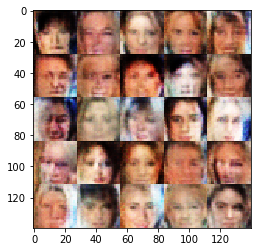

Epoch 1/1... Discriminator Loss: 1.2846... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.5820... Generator Loss: 0.3980
Epoch 1/1... Discriminator Loss: 1.2171... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 1.2218


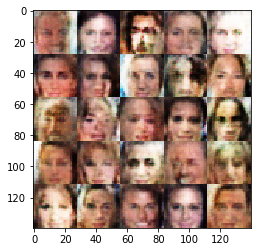

Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 0.9251
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.6271... Generator Loss: 0.9782
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.7732


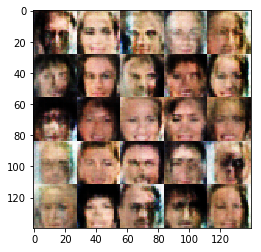

Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.4761... Generator Loss: 0.4424
Epoch 1/1... Discriminator Loss: 1.5646... Generator Loss: 1.4215


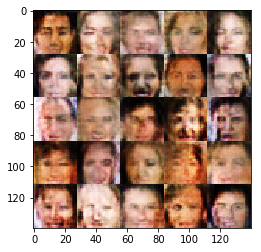

Epoch 1/1... Discriminator Loss: 1.6004... Generator Loss: 0.3867
Epoch 1/1... Discriminator Loss: 1.2879... Generator Loss: 1.0321
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.4897
Epoch 1/1... Discriminator Loss: 1.1459... Generator Loss: 0.7967


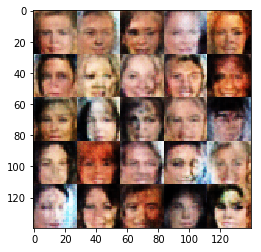

Epoch 1/1... Discriminator Loss: 1.1063... Generator Loss: 1.5832
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 1.1455
Epoch 1/1... Discriminator Loss: 1.5837... Generator Loss: 1.5439
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.9420


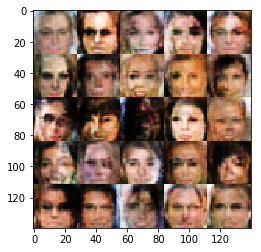

Epoch 1/1... Discriminator Loss: 1.3411... Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.9486... Generator Loss: 0.3012
Epoch 1/1... Discriminator Loss: 1.4256... Generator Loss: 0.9266
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.7274


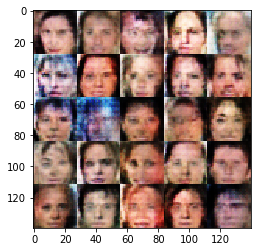

Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.0597... Generator Loss: 0.9660


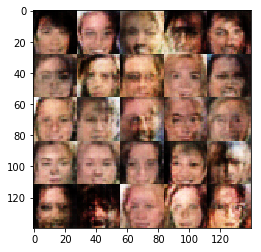

Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 1.1921
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 1.1484
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.5836
Epoch 1/1... Discriminator Loss: 1.1838... Generator Loss: 0.7802


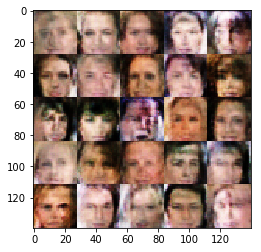

Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.4730... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.6480


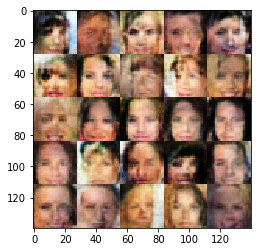

Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 0.9079
Epoch 1/1... Discriminator Loss: 1.2181... Generator Loss: 1.2212
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 1.3264


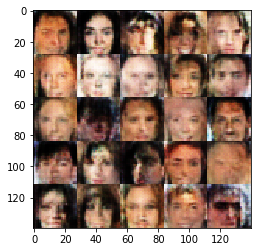

Epoch 1/1... Discriminator Loss: 1.4894... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.6839... Generator Loss: 1.2470
Epoch 1/1... Discriminator Loss: 1.5608... Generator Loss: 0.6601


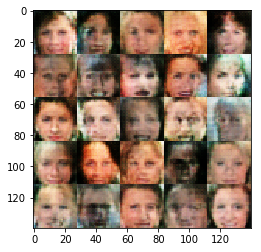

Epoch 1/1... Discriminator Loss: 1.5307... Generator Loss: 0.7241
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.1920... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.6590


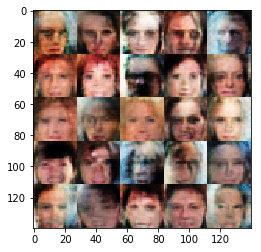

Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.8977
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 2.8373... Generator Loss: 0.1279


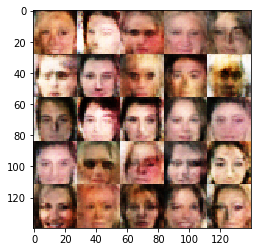

Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.9660
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 0.9317
Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 0.7954
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7809


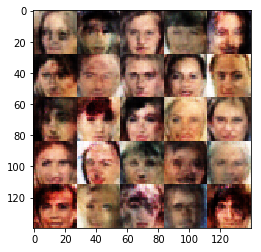

Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.7700
Epoch 1/1... Discriminator Loss: 1.1647... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.9120
Epoch 1/1... Discriminator Loss: 1.0193... Generator Loss: 0.9599


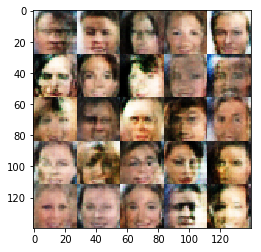

Epoch 1/1... Discriminator Loss: 1.4786... Generator Loss: 0.9515
Epoch 1/1... Discriminator Loss: 1.0022... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 0.9302


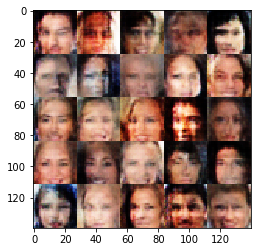

Epoch 1/1... Discriminator Loss: 1.1604... Generator Loss: 0.9387
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.0369... Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.0810... Generator Loss: 0.9926


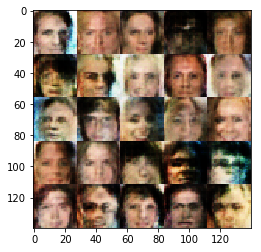

Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.9721
Epoch 1/1... Discriminator Loss: 1.4936... Generator Loss: 0.7704
Epoch 1/1... Discriminator Loss: 1.2738... Generator Loss: 1.2649
Epoch 1/1... Discriminator Loss: 1.5294... Generator Loss: 0.7693


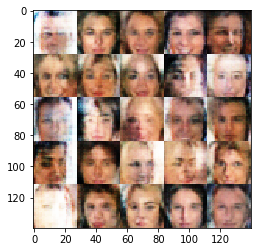

Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 1.0822
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.7402
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.9712


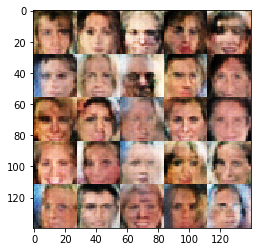

Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.5156... Generator Loss: 0.4114
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 0.6569


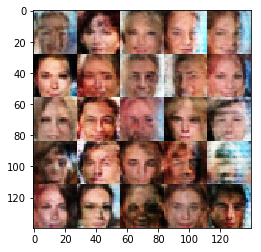

Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.8216
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 0.9229


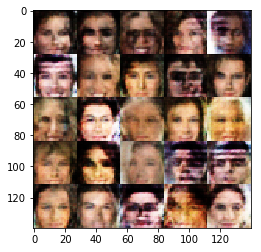

Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.7762
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 1.0440
Epoch 1/1... Discriminator Loss: 1.5069... Generator Loss: 0.9102


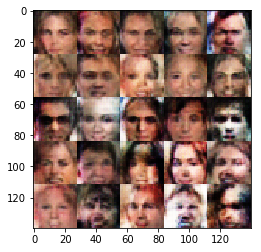

Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 1.1563... Generator Loss: 1.0256
Epoch 1/1... Discriminator Loss: 1.4874... Generator Loss: 0.6132
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 1.2381


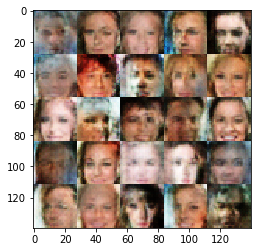

Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.1937... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8671
Epoch 1/1... Discriminator Loss: 1.1775... Generator Loss: 0.6766


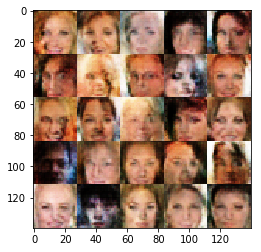

Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 0.9997... Generator Loss: 0.8841
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 0.8589


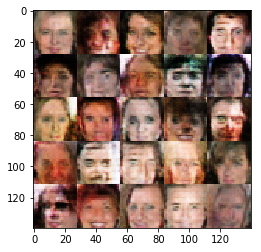

Epoch 1/1... Discriminator Loss: 1.2940... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 1.0298
Epoch 1/1... Discriminator Loss: 0.9461... Generator Loss: 0.8803


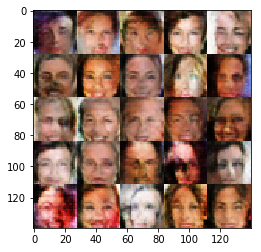

Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 0.4424
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.5806


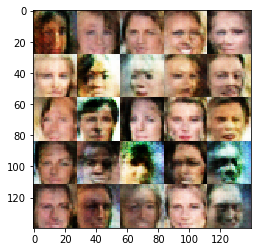

Epoch 1/1... Discriminator Loss: 1.6178... Generator Loss: 0.3696
Epoch 1/1... Discriminator Loss: 1.2485... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 1.1781... Generator Loss: 0.9216
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.9142


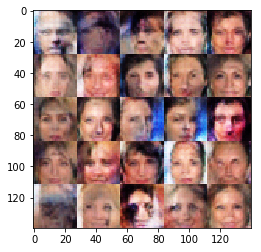

Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 1.3781
Epoch 1/1... Discriminator Loss: 1.2412... Generator Loss: 0.7534
Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.8226
Epoch 1/1... Discriminator Loss: 2.1308... Generator Loss: 0.2615


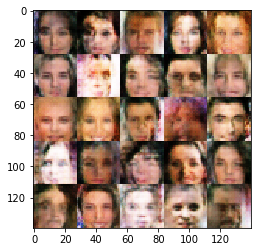

Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 1.0915
Epoch 1/1... Discriminator Loss: 1.1734... Generator Loss: 0.7198
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.7105
Epoch 1/1... Discriminator Loss: 1.0991... Generator Loss: 0.9315


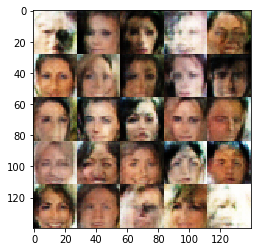

Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.1828... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 1.2178... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.1780... Generator Loss: 0.9077


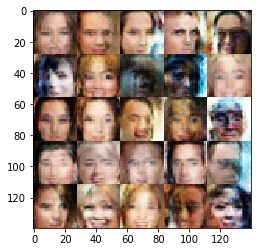

Epoch 1/1... Discriminator Loss: 0.9228... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 1.0595... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 2.3453... Generator Loss: 0.2859
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.8342


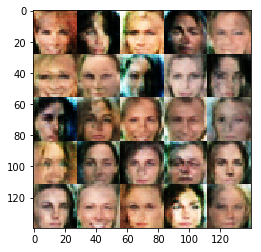

Epoch 1/1... Discriminator Loss: 0.9526... Generator Loss: 0.9110
Epoch 1/1... Discriminator Loss: 1.0660... Generator Loss: 0.8229
Epoch 1/1... Discriminator Loss: 1.2445... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 1.1434


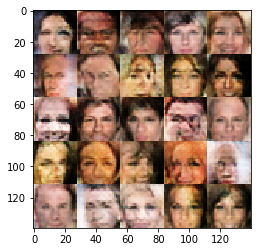

Epoch 1/1... Discriminator Loss: 1.1766... Generator Loss: 0.9298
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 0.7260


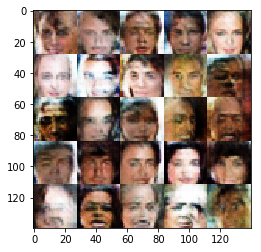

Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.8294
Epoch 1/1... Discriminator Loss: 0.9790... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.7470


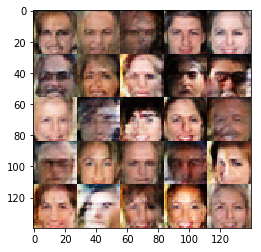

Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 0.9530
Epoch 1/1... Discriminator Loss: 1.3177... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.1253... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 1.0791... Generator Loss: 0.7122


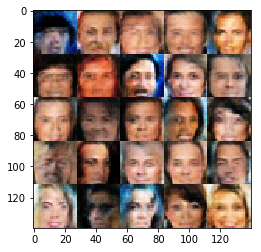

Epoch 1/1... Discriminator Loss: 1.1160... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 1.1300... Generator Loss: 0.7801


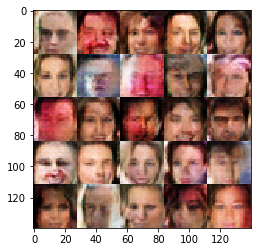

Epoch 1/1... Discriminator Loss: 1.2665... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 1.3384... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 2.1879... Generator Loss: 0.3673


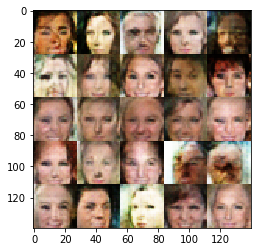

Epoch 1/1... Discriminator Loss: 1.2178... Generator Loss: 1.4351
Epoch 1/1... Discriminator Loss: 1.3196... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.1343... Generator Loss: 0.8675


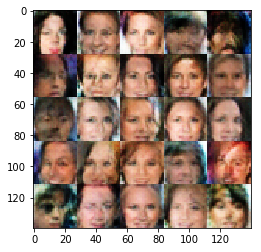

Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 1.0724
Epoch 1/1... Discriminator Loss: 1.2828... Generator Loss: 0.9657
Epoch 1/1... Discriminator Loss: 0.9187... Generator Loss: 0.8963


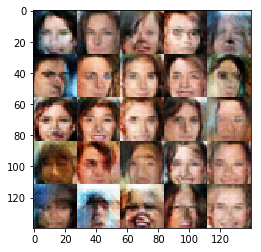

Epoch 1/1... Discriminator Loss: 1.5347... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.0350... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 1.0799... Generator Loss: 0.9115


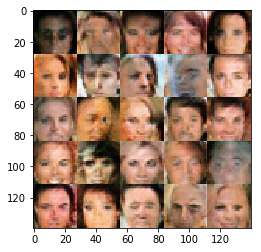

Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 1.2449
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 0.8434


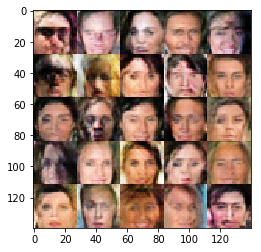

Epoch 1/1... Discriminator Loss: 1.1534... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 0.7138
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.8427


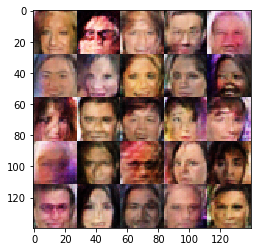

Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.8281
Epoch 1/1... Discriminator Loss: 1.1825... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 0.8221


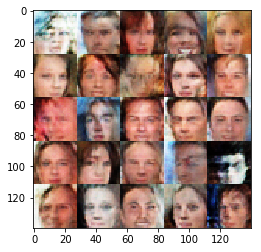

Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 0.8832
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.5186... Generator Loss: 0.7365
Epoch 1/1... Discriminator Loss: 1.8741... Generator Loss: 0.4518


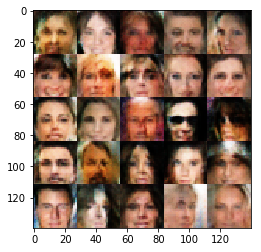

Epoch 1/1... Discriminator Loss: 1.1890... Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.6774
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.7819


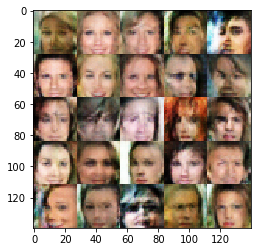

Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.7162
Epoch 1/1... Discriminator Loss: 1.2764... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.2792... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.6368


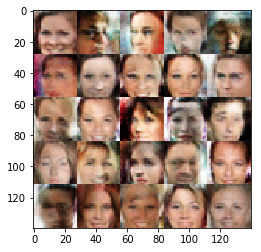

Epoch 1/1... Discriminator Loss: 1.2373... Generator Loss: 0.9645
Epoch 1/1... Discriminator Loss: 1.5704... Generator Loss: 0.4507
Epoch 1/1... Discriminator Loss: 1.6056... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.8457


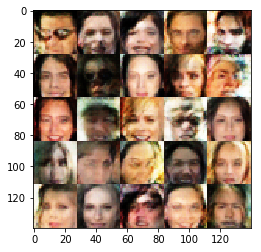

Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.1235... Generator Loss: 0.8873
Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 0.8555
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.7894


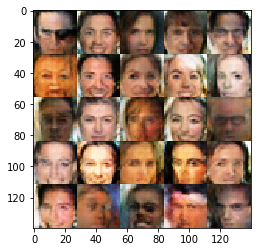

Epoch 1/1... Discriminator Loss: 1.0122... Generator Loss: 0.9422
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.7624
Epoch 1/1... Discriminator Loss: 1.5688... Generator Loss: 0.5215
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.4938


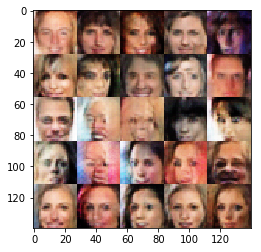

Epoch 1/1... Discriminator Loss: 1.2126... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 0.7707
Epoch 1/1... Discriminator Loss: 1.1631... Generator Loss: 0.9538
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 0.7723


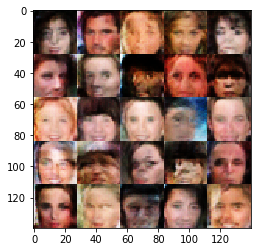

Epoch 1/1... Discriminator Loss: 1.2425... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.2303... Generator Loss: 0.7546


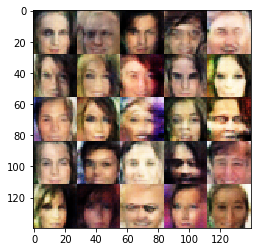

Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.3319... Generator Loss: 0.9645
Epoch 1/1... Discriminator Loss: 1.0065... Generator Loss: 0.9000
Epoch 1/1... Discriminator Loss: 1.1194... Generator Loss: 0.7620


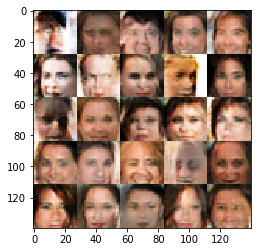

Epoch 1/1... Discriminator Loss: 0.9874... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 0.6942
Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 0.7970


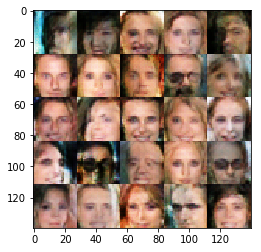

Epoch 1/1... Discriminator Loss: 1.5575... Generator Loss: 0.6446


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.